#### TF.Snoqualmie_Radiation.ipynb
Karl Lapo October/2015

Exploring Snoqualmie radiation data


In [2]:
# must insert this statement to render the plots within the notebook
# this is specific to the ipython notebook
%matplotlib inline

## Import statements
# netcdf/numpy/xray/stats
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import xray
from scipy.stats.stats import pearsonr

# OS interaction
import sys, pickle, os

# import subplots function for plotting
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap

# Solargeometry
import solargeo

## Directory listing
dir_print = '/Users/karllapo/gdrive/SnowHydrology/proj/TurbulenceFeedbacks/Graphics'
dir_data = '/Users/karllapo/gdrive/SnowHydrology/proj/TurbulenceFeedbacks/data/SNQ'

In [3]:
## Load data
os.chdir(dir_data)
ds = xray.open_dataset('SnoqualmieObs.wy2013.wy2015.nc')
print(ds)

<xray.Dataset>
Dimensions:  (time: 45741)
Coordinates:
  * time     (time) datetime64[ns] 2012-10-01 2012-10-01T00:30:00 ...
Data variables:
    precip   (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    SWdwn    (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    LWdwn    (time) float64 286.9 286.9 286.5 286.5 286.5 286.5 286.5 286.5 ...
    Tair     (time) float64 279.0 279.0 279.0 279.2 279.4 279.4 279.1 278.9 ...
    WIND     (time) float64 0.068 0.126 0.06 0.126 0.045 0.099 0.199 0.116 ...
    Press    (time) float64 9.088e+04 9.086e+04 9.085e+04 9.085e+04 ...
    QS       (time) float64 0.005277 0.005341 0.005394 0.005419 0.005373 ...
    RH       (time) float64 83.35 84.34 85.05 84.36 82.46 83.76 84.16 84.74 ...
    Tdew     (time) float64 3.24 3.407 3.546 3.611 3.49 3.661 3.512 3.409 ...
    Tsurf    (time) float64 nan nan nan nan nan nan nan nan nan nan nan nan ...


In [4]:
############################################################################
## Functions
############################################################################

In [5]:
## These still require some testing to make sure they are physical...
def stability(Tair,Tsurf,U,z=2):
    g = 9.81
    Ri = g*z*(Tair-Tsurf)/(.5*(Tair+Tsurf)*U**2)
    return(Ri)

Ri = stability(ds.Tair.values,ds.Tsurf.values+273.16,ds.WIND.values,z=3)
ds['Ri'] = (('time'),Ri)
print(ds)

<xray.Dataset>
Dimensions:  (time: 45741)
Coordinates:
  * time     (time) datetime64[ns] 2012-10-01 2012-10-01T00:30:00 ...
Data variables:
    precip   (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    SWdwn    (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    LWdwn    (time) float64 286.9 286.9 286.5 286.5 286.5 286.5 286.5 286.5 ...
    Tair     (time) float64 279.0 279.0 279.0 279.2 279.4 279.4 279.1 278.9 ...
    WIND     (time) float64 0.068 0.126 0.06 0.126 0.045 0.099 0.199 0.116 ...
    Press    (time) float64 9.088e+04 9.086e+04 9.085e+04 9.085e+04 ...
    QS       (time) float64 0.005277 0.005341 0.005394 0.005419 0.005373 ...
    RH       (time) float64 83.35 84.34 85.05 84.36 82.46 83.76 84.16 84.74 ...
    Tdew     (time) float64 3.24 3.407 3.546 3.611 3.49 3.661 3.512 3.409 ...
    Tsurf    (time) float64 nan nan nan nan nan nan nan nan nan nan nan nan ...
    Ri       (time) float64 nan nan nan nan nan nan nan nan nan nan nan n

In [6]:
## Tau
EL = solargeo.AVG_EL(pd.to_datetime(ds.time.values),np.array(47.424883),np.array(-121.413893),8,'END')
ds['tau'] = ds.SWdwn/(np.sin(EL*np.pi/180)*1365)


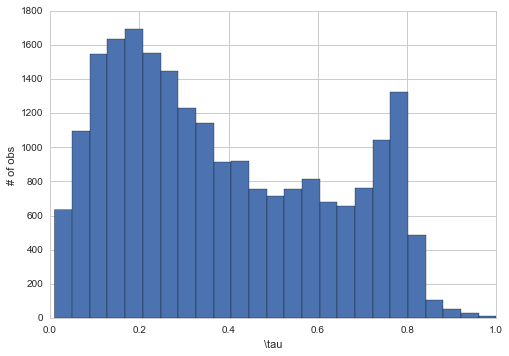

In [8]:
## Histogram
tau_for_hist = ds.tau.values
tau_for_hist = np.ma.masked_where(np.isnan(tau_for_hist),tau_for_hist)
tau_for_hist = np.ma.masked_where(np.isinf(tau_for_hist),tau_for_hist)

n, bins, patches = plt.hist(tau_for_hist,range=(.01,1),bins=25)
ax = plt.axes()
ax.set_ylabel('# of obs')
ax.set_xlabel('\\tau')